In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/trans')

In [3]:
#read expresion matrix and transcriptomic correlation
ed = pd.read_csv('matrix-2-transcriptome-correlation.csv', index_col =0)
exp = pd.read_csv('matrix-5-Expression.csv', index_col = 0)

In [4]:
eud = ed
eu = ed

FINDING MATURE - IMMATURE PAIR OF ORs 

In [5]:
#MAKE A LIST OF ALL ORS AND CELLS AND TRANSPOSE THE EXP MATRIX
ors=list(exp.columns.values.tolist())
cells=exp.index.values
tr_exp=exp.T

In [6]:
#CHECK IF THE CELL EXPRESSES MORE THAN 8 ORS THEN APPEND THE CELL ID 
all_ors={}
zero_exp=[]
for cell in cells:
  all_ors[cell]=[]
  cell_exps=sorted(tr_exp[cell].tolist(), reverse=True)
  if cell_exps[0]>0:
    if tr_exp[cell].tolist().count(max(cell_exps)) > 8:
      for i in range(tr_exp[cell].tolist().count(max(tr_exp[cell]))):
        all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
    else:
      for i in range(8):
        if cell_exps[i]>0:
          all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
  else:
    zero_exp.append(cell)

In [7]:
#INDIVIDUALLY MAKE A DICTIONARY FOR EACH CELL TYPE WHERE THE CELL ID AND THE EXPRESSED OR IS STORED
cell_imt={}

cell_imm={}
cell_mat={}
for key,value in all_ors.items():
  if key.startswith("IMT"):
    cell_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imt[key].append(val)
  if key.startswith("MA"):
    cell_mat[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_mat[key].append(val)
  if key.startswith("IMM"):
    for val in value:
      cell_imm[key]=[]
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm[key].append(val)


In [8]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IM"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)

In [9]:
#CHECK IF THERE IS NO EXPRESSION OF OR, MAKE A NEW DICTIONARY WITH ONLY EXPRESSED ORs
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

READING PERCENTILE FILES AND INTERSECTION

0    2351
1     127
2      10
3       2
dtype: int64
0    2308
1     167
2      13
3       2
dtype: int64
5
0    2322
1     152
2      14
3       2
dtype: int64
0    2268
1     199
2      21
3       2
dtype: int64
9
0    2287
1     180
2      21
3       2
dtype: int64
0    2213
1     237
2      37
3       3
dtype: int64
21
0    2247
1     215
2      26
3       2
dtype: int64
0    2160
1     277
2      38
3      13
4       1
5       1
dtype: int64
42
0    2192
1     258
2      36
3       3
4       1
dtype: int64
0    2082
1     334
2      52
3      13
5       6
6       2
4       1
dtype: int64
83
0    2158
1     285
2      38
3       8
4       1
dtype: int64
0    2034
1     365
2      62
3      14
4       5
5       5
7       3
6       2
dtype: int64
125
0    2115
1     311
2      52
3       9
4       3
dtype: int64
0    1978
1     400
2      74
3      18
4       7
8       4
5       3
6       3
7       2
9       1
dtype: int64
207
0    2104
1     320
2      50
3      11
4       5
dtype: 

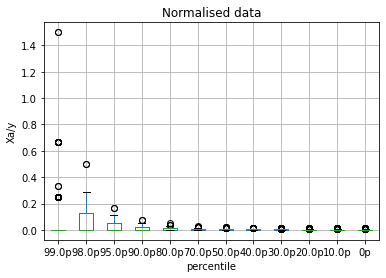

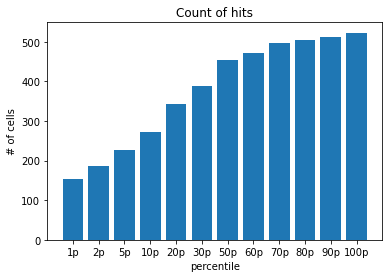

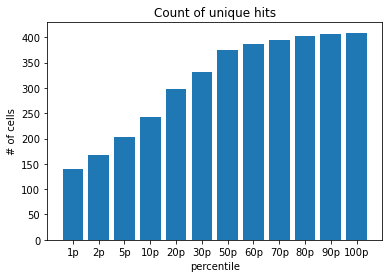

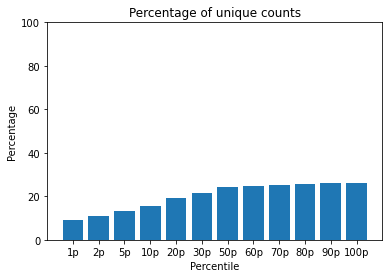

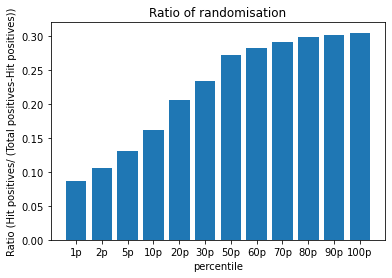

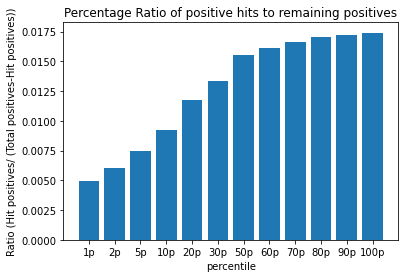

In [10]:
#GENERATE UNIQUE HITS RANDOMLY 10 TIMES
os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/trans')
ratio_data={}
unique_number = {}
unique_percentage = {}
for folder in range(1):
    di='test_'+str(folder)
    os.mkdir(di)
    os.chdir(di) 
    with open("Out_data_trn_"+str(folder)+".csv","w")as fout:
        fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
        empty_mat=[]
        mat_cell=eud.index
        imm_imt_cells=list(eud.columns.values.tolist())
        for i in range(len(mat_cell)):
            mat1={}
            for j in range(len(imm_imt_cells)):
                mat1[eud.iloc[i][j]]=imm_imt_cells[j]
            euds=sorted(mat1.keys(), reverse=True)
            for j in range(len(euds)):
                if len(cell_mat[mat_cell[i]])==0:
                    empty_mat.append(mat_cell[i])
                else:
                    if cell_mat[mat_cell[i]][0] in cell_imm_imt[mat1[euds[j]]]:
                        for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                            if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]][0]:
                                #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
                                fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

    
            #CALCULATING PERCENTILE AT DIFFERENT THRESHOLD 
    eu = eud
    li = [0.99, 0.98, 0.95, 0.9, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
    for ki in li:
        q = eu.quantile(ki , axis = 1)
        q1 = q.tolist()
        qq = pd.DataFrame(q)

        idd = eu.index.tolist()
        ccl = eu.columns.tolist()
        d4=dict.fromkeys(idd)

        #loop to generate imm cells
        k = []
        for i in range(len(idd)):
            for j in range(len(ccl)):
                if eu.iloc[i][j] > q1[i]:
                    k.append(ccl[j])
            d4[idd[i]] = k
            k=[]

        p = []
        for i in idd:
            p.append(len(d4[i]))
        cells = pd.DataFrame.from_dict(d4, orient='index')
        cells.to_csv(str(ki)+'percentile_trn_total_immature.csv')

    
            #ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
    
    for ki in li:
        p=pd.read_csv(str(ki)+'percentile_trn_total_immature.csv', index_col = 0)
        o = pd.read_csv('Out_data_trn_'+str(folder)+'.csv')
        dictt={}
        v =  o['Mature Cell ID'].tolist()
        v2 = o['Immature/Transition Cell ID'].tolist()
        for indx in range(len(v)):
            if v[indx]==v[indx-1]:
                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        ke=[]
        for key in dictt:
            ke.append(key)
        pp = p.loc[ke].T
        ppp = pp.to_dict('list')
        dup = pd.read_csv('Out_data_trn_'+str(folder)+'.csv')
        stat=[]
        for i in range(0,len(dup['Immature/Transition Cell ID'])):
            if dup['Immature/Transition Cell ID'][i] in ppp[dup['Mature Cell ID'][i]]:
                stat.append('Positive')
            else:
                stat.append('Negative')

        dup['status'] = stat
        #dup.to_csv('Final_spl_10q.csv')
        dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        euk = dup[(dup['status']=='Positive') & (dup['Expression Diffrence from rank1']==0)]
        euk.to_csv(str(ki)+'_final_res.csv')

    
       #CREATING A DATAFRAME AT DIFFERENT PERCENTILE SHOWING RATIO OF EXPRESSED ORs HAVING HIGHEST EXPRESSION TO NON-EXPRESSED
 
    
    DF4=pd.DataFrame()
    for ki in li:
        x = pd.read_csv(str(ki)+'_final_res.csv', index_col = 0)
        o = pd.read_csv('Out_data_trn_'+str(folder)+".csv", index_col =0)
        eu = eud
        mat_uniq = eu.index.tolist()
        dictt={}
        v =  x['Mature Cell ID'].tolist()
        v2 = x['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        xa_dict={}
        for ma in mat_uniq:
            if ma in dictt.keys():
                xa_dict[ma]=len(dictt[ma])
            else:
                xa_dict[ma]=0
        df2 = pd.DataFrame.from_dict(xa_dict, orient='index')
        print(df2.value_counts())

        pos_neg = pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        pos_neg2 = pos_neg[pos_neg['status'] == 'Positive']
        dictt2={}
        v =  pos_neg2['Mature Cell ID'].tolist()
        v2 = pos_neg2['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt2[v[indx]].append(v2[indx])
            else:
                dictt2[v[indx]]=[]
                dictt2[v[indx]].append(v2[indx])

        x_dict={}
        for ma in mat_uniq:
            if ma in dictt2.keys():
                x_dict[ma]=len(dictt2[ma])
            else:
                x_dict[ma]=0

        df3 = pd.DataFrame.from_dict(x_dict, orient='index')
        print(df3.value_counts())
        df3.columns = ['x']
        percentile = pd.read_csv(str(ki)+'percentile_trn_total_immature.csv', index_col =0)
        xny=len(percentile.columns.values.tolist())
        print(xny)
        if len(percentile.index.values.tolist())==len(df3):
            df3['y'] = xny - df3['x'] 
        xa = df2[0].values.tolist()
        df3['xa'] = xa
        df3['xay'] = df3['xa']/df3['y']
        df3.to_csv(str(ki*100)+'percentile_boxplot.csv')

        DF4[str(ki*100)+'p']=df3['xay']

    DF4.to_csv('plot_boxplot.csv')
    p  = o.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')['Mature Cell ID'].tolist()
    DF4.loc[p].boxplot()
    plt.xlabel('percentile')
    plt.ylabel('Xa/y')
    plt.title('Normalised data')
    plt.savefig('normalised_data.pdf')
    plt.show()

    o_unique = o.drop_duplicates(subset = 'Mature Cell ID', keep ='first')
    mat_uniq= o_unique['Mature Cell ID'].values.tolist()
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()

    for indx in range(len(v)):
        if v[indx]==v[indx-1]:

            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])

    f1 = pd.read_csv('0.99_final_res.csv')
    f2 = pd.read_csv('0.98_final_res.csv')
    f5 = pd.read_csv('0.95_final_res.csv')
    f10 = pd.read_csv('0.9_final_res.csv')
    f20 = pd.read_csv('0.8_final_res.csv')
    f30 = pd.read_csv('0.7_final_res.csv')
    f50 = pd.read_csv('0.5_final_res.csv')
    f60 = pd.read_csv('0.4_final_res.csv')
    f70 = pd.read_csv('0.3_final_res.csv')
    f80 = pd.read_csv('0.2_final_res.csv')
    f90 = pd.read_csv('0.1_final_res.csv')
    f100 = pd.read_csv('0_final_res.csv')

        #PLOT OF NUMBER OF HITS
    
    
    liii=[f1, f2, f5, f10, f20, f30, f50, f60, f70, f80, f90, f100]
    valss=[]
    for i in liii:
        valss.append(len(i))

    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss)
    plt.title('Count of hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of hits.pdf')
    plt.show()

    unique_f1 = f1.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f2 = f2.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f5 = f5.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f10 = f10.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f20 = f20.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f30 = f30.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f50 = f50.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f60 = f60.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f70 = f70.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f80 = f80.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f90 = f90.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f100 = f100.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')

    
        #PLOT OF NUMBER OF unique HITS

    
    
    liii=[unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, unique_f80,
          unique_f90, unique_f100]
    valss_unique=[]
    for i in liii:
        valss_unique.append(len(i))
        
    unique_number[str(folder)]=valss_unique
    
    gra = pd.DataFrame(valss_unique)
    gra.to_csv('unique-count.csv')

    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss_unique)
    plt.title('Count of unique hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of unique hits.pdf')
    plt.show()

    valssf=[]
    for v in valss_unique:
        valssf.append((v/1751)*100)
        
        
    unique_percentage[str(folder)]=valssf
    
    
    gra = pd.DataFrame(valssf)
    gra.to_csv('unique-percentage.csv')

    plt.bar(x,valssf)
    plt.title('Percentage of unique counts')
    plt.xlabel('Percentile')
    plt.ylabel('Percentage')
    plt.savefig('percentage')
    plt.yticks([0, 20, 40, 60, 80, 100])
    plt.savefig('percentage_test_divbyunique.pdf')
    plt.show()

    list1 = [unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, 
             unique_f80, unique_f90, unique_f100]

    graph1 =[]
    for mature_cell in list1:
        graph1.append(len(mature_cell)/(1751-len(mature_cell)))

    gra = pd.DataFrame(graph1)
    gra.to_csv('graph1.csv')
    
    xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(xaxis,graph1)
    plt.title('Ratio of randomisation')
    plt.xlabel('percentile')
    plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
    plt.savefig('ratio graph.pdf')
    plt.show()

    ratio_data[str(folder)]=graph1
    list2 = graph1
    
    ratio_data[str(folder)]=graph1
    list2 = graph1
    graph2 =[]
    for mature_cell in list2:
        graph2.append((mature_cell/1751)*100)
    
    
    xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(xaxis,graph2)
    plt.title('Percentage Ratio of positive hits to remaining positives')
    plt.xlabel('percentile')
    plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
    plt.savefig('ratio graph percentage.pdf')
    plt.show()
    os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/trans')

In [13]:
data_frame = pd.DataFrame.from_dict(ratio_data, orient = 'columns')
data_frame.to_csv('chi-square-data-euclidean-test.csv')

In [14]:
data_frame = pd.DataFrame.from_dict(unique_percentage, orient = 'columns')
data_frame.to_csv('chi-square-unique percentage-euc-test.csv')

In [15]:
data_frame = pd.DataFrame.from_dict(unique_number, orient = 'columns')
data_frame.to_csv('chi-square-unique count-euc-test.csv')